<center><img src="Images/dice.png" alt="dice" style="align:center; width:200px"></center>

# The Numpy Random Package

[Official documentation](https://numpy.org/doc/stable/reference/random/index.html)

***

<br>

## Table of Contents

#### [1. Introduction](#Intro)

#### [2. Simple random data](#Simple)
&nbsp;&nbsp;&nbsp;&nbsp;[- Integers](#Integers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Floats](#Floats)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Choice](#Choice)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Bytes](#Bytes)

#### [3. Permutations](#Perm)
&nbsp;&nbsp;&nbsp;&nbsp;[- Shuffle](#Shuffle)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permutation](#Permutations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permuted](#Permuted)

#### [4. Distributions](#Distr)
&nbsp;&nbsp;&nbsp;&nbsp;[- Normal](#Normal)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permutations](#Permutations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permutations](#Permutations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permutations](#Permutations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[- Permutations](#Permutations)<br>


<br>
<a id="Intro"></a>

## 1. Introduction
***

Random number generation has many applications in the real world such as gambling, statistics, computer simulation, cryptography and any other area that produces an unpredicatable outcome. Applications that require maximum unpredictability such as security implementations, generally use hardware generators(HRNG) that generate actual random numbers. Also known as True Random Number Generators (TRNG), such a device generates random numbers via a physical process, such as radioactive decay or thermal noise in a semiconductor. Both instrinsically random processes as per quantum theory.[1][https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.110.9725&rep=rep1&type=pdf] However, for applications that do not rely on extremely unpredictable results, a process known as pseudorandom number generation is used. It is called psuedorandom 

Numpy's random package produces pseudorandom numbers by combining a BitGenerator, which produces a sequence of random bits (typically 32 or 64 bits) and a Generator, that converts the sequence into a sequence of numbers. The Generator conforms to a particular probability distribution ie., uniform, Normal or Binomial. [https://numpy.org/doc/stable/reference/random/index.html] accessed 2.11.21

<a id="RS-v-Gen"></a>

#### Random State vs Generator

Generator replaces the legacy version Random State, since being updated in version 1.17.0. Random State legacy version is still be used however, it is limited to a single bitGenerator. Generator has multiple bitGenerators - meaning many distinct probability distributions are available for use. A further benefit of Generator is that by default it utilises bits that are produced by PCG-64, a 28-bit execution of O’Neill’s permutation congruential generator, which provides great statistical algorithms for generating random numbers that are difficult to predict.[https://www.pcg-random.org/index.html] accessed 2.11.21

For the random generator documentation click here: [Random Generator Documentation](https://numpy.org/doc/stable/reference/random/generator.html)

[1] RANDy - A True-Random Generator Based On Radioactive
Decay
Markus Rohe
(mail@markus-rohe.de)
Fortgeschrittenenpraktikum
Advisor: Ammar Alkassar
Security and Cryptography Research Group
Saarland University
SS 2003
### 

### Set up
***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting data.
import matplotlib.pyplot as plt

# Nice plot style. DELETE IF NOT USED
import seaborn as sns

# Set default plot style.
plt.style.use('fivethirtyeight')

# Set default figure size.
plt.rcParams['figure.figsize'] = [5, 5]

# Renders plots nicely in notebook.
%matplotlib inline

<br>

### Construct a Generator

***

"The seed is given an integer value to ensure that the results of pseudo-random generation are reproducible. By re-using a seed value, the same sequence should be reproducible from run to run as long as multiple threads are not running. Reproducibility is a very important concept that ensures that anyone who re-runs the code gets the exact same outputs." [https://medium.com/geekculture/the-story-behind-random-seed-42-in-machine-learning-b838c4ac290a]

To do: 

Is there a default seed?

The variable `rng` will be used in place of `np.random.generator` in code examples for simplification.

In [2]:
# Create a new generator with bitGenerator PCG64
rng = np.random.default_rng(1) # Add seed info later!!!

<br>

`rng` will be used in place of `np.random.generator` in code examples.

<br>
<a id="#Simple"></a>


# 2. Simple random data

This section introduces numpy's built-in functions for producing random numbers.
***

<br>
<a id="Integers"></a>

### `integers()`

Generates random integer values. 

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers)
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)`

<br>

#### Produce random integer(s)
***

The range is specified using the low and high parameters, the low value is inclusive while the high value is exclusive.

The returned integers are from the discrete uniform distribution meaning each n value has equal probability of being returned.

In [3]:
# Random integer array.
rng.integers(low=0, high=10, size=20)

array([4, 5, 7, 9, 0, 1, 8, 9, 2, 3, 8, 4, 2, 8, 2, 4, 6, 5, 0, 0])

In [4]:
# A single random integer. 
rng.integers(0, 10, 1)

array([8])

<br>

#### Specifying endpoint
***

With endpoint set to True the range of numbers is inclusive of high and low values.


In [5]:
# endpoint=True
ran_int = rng.integers(low=0, high=10, size=20, endpoint=True)
ran_int

array([ 8,  9,  5,  8,  3,  4,  8,  1,  3,  1,  4, 10,  1,  4,  4,  9,  2,
        5,  2,  0])

<br>

#### Default dytype
***

64 bits for high precision accuracy. However, 32 bits is sufficient for most functions. 

In [6]:
# Check the type of data the function produces.
type(ran_int[0])

numpy.int64

<br>
<a id="Floats"></a>

### `random()`

Generates random float values.

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.random(size=None, dtype=np.float64, out=None)`

<br>


In [7]:
# Generate a single floating point number with parameter size parameter set to None
rng.random(size=None)

0.2804087579860399

In [8]:
# Generate an array of floats each using 32 bits of memory. 64 bits is default and used for high precisison. 
a = rng.random(size=100000, dtype=np.float32) # Default range is 0 - 0.9999. 

In [9]:
# Generate multiple arrays.
rng.random(size=(5, 5))

array([[0.34555349, 0.70947514, 0.88359907, 0.99191495, 0.98892584],
       [0.07962394, 0.40554407, 0.1546229 , 0.00712658, 0.64592423],
       [0.70408528, 0.03995719, 0.89615615, 0.0314872 , 0.88237168],
       [0.13168999, 0.63191389, 0.64196223, 0.99572567, 0.41647897],
       [0.8397817 , 0.81953008, 0.95907566, 0.24287479, 0.87094295]])

<br>
<a id="Choice"></a>

### `choice()`
Generates a random sample from an array. 


[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice)
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)`<br>

<br>

### Produce an array of strings
***

The default for values returned is discrete uniform, similar to the integer function above, each value has the same probability of being returned. The example below illustrates this ie., a single value being chosen multiple times. 

Unlike the integer function, however, this setting can be changed as we will see with the `replace` parameter explanation at the end of this section.

In [10]:
# Choose a colour at random 10 times and plot results.
x = rng.choice(["yellow", "red", "blue", "green"], size=10)
x

array(['blue', 'green', 'red', 'yellow', 'red', 'blue', 'red', 'green',
       'blue', 'red'], dtype='<U6')

<br>

### Plot the choices
***

A visual representation of the selections made by the choice function. 

<AxesSubplot:title={'center':'No. of times colours selected'}, ylabel='Count'>

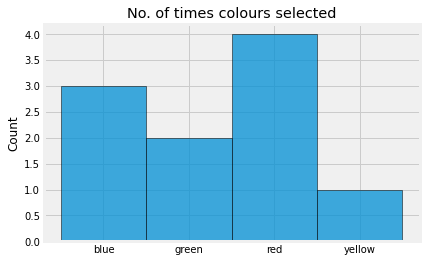

In [11]:
# Plot x.
plt.title("No. of times colours selected")
sns.histplot(x, bins=8, edgecolor='black')

<br>

### The replace parameter
***


`replace=True` is the default setting and means that for each random selection all of the original values are included in the array. This is the default setting and can be observed in the example above. 

`replace=False` after a selection is made, the selected value will not be placed back into the array.


In [12]:
# Replace=False. 
y = rng.choice(["yellow", "red", "blue", "green", "purple", "black", "orange", "white"], size=[8], replace=False)
y

array(['green', 'purple', 'black', 'blue', 'red', 'yellow', 'orange',
       'white'], dtype='<U6')

<br>

### Plot the choices
***

As can be seen below, each value can only be chosen once as it is removed from the array after its selection. 

<AxesSubplot:title={'center':'No. of times colours selected'}, ylabel='Count'>

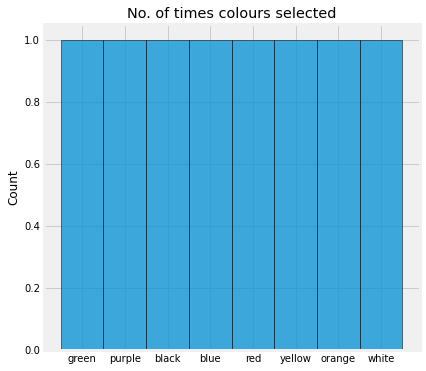

In [13]:
# Enhance plot size. 
plt.rcParams['figure.figsize'] = [6, 6]

# Plot y. 
plt.title("No. of times colours selected")
sns.histplot(y, bins=8, edgecolor="black")

In [14]:
# Randomly selecting a single item.
rng.choice([1, 2, 3, 4, 5], size=1)

array([4])

## To do: Discuss the `p` parameter here and how probability can be specified. 

<br>

### Simple random data discussion:

While the random.Generator.integers and random.Generator.choice both choose select values (integers from a range, and choice from a given array), the significant differences bring that choice allows:

- the specification as to whether a replacement value placed in the array or not.
- the specificaton of probability of an item being selected.(uniform distribution is default) 

https://stackoverflow.com/questions/55772716/how-is-numpy-choice-different-from-numpy-randint

<br>
<a id="Bytes"></a>

### `bytes()`

Generates random bytes. 

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes)
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.bytes(length)`

<br>


This function simply returns a string of random bytes with the size of the return specified by the length parameter.

In [15]:
x = rng.bytes(10)
x

b'|1\xe1A\xb1\xfb\xd1\xb7\xf9\xbb'

In [16]:
# Check type.
type(x)

bytes

<br>

<a id="Permutations"></a>

# 3. Permutations

Permutations is the number of ways a sequence can be arranged where ordering is significant. It can be compared to combinations, on the contrary, where ordering is insignificant. 
***

<br>
<a id="Shuffle"></a>


### `shuffle()`
[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle)

Randomly shuffles items of a given array in-place. 

***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.shuffle(x, axis=0)`

<br>

<br>

Shuffling is uselful in applications where it is important to avoid bias. Machine learning often uses shuffling in its operations. 

<br>

#### Shuffle 1-dimensional array
***

In [17]:
# Create an array.
arr = np.arange(11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
# Shuffle the array. 
rng.shuffle(arr)
arr

array([ 8,  3,  5,  6,  4,  0,  7,  1, 10,  9,  2])

<br>

#### Shuffle 2-dimensional array.
***

In [19]:
# Generate & shuffle 4 arrays.
arr = np.arange(16).reshape((4, 4))

# Default axis=0 rearranges the rows.
rng.shuffle(arr)
arr

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7]])

<br>

### axis parameter
***

The axis default is 0. The following example illustrates the outcome when the axis is set to 1. 

In [20]:
# Axis=1
arr = np.arange(64).reshape(8, 8)

# axis=1 rearranges the columns. 
rng.shuffle(arr, axis=1)
arr

array([[ 0,  6,  1,  4,  2,  5,  7,  3],
       [ 8, 14,  9, 12, 10, 13, 15, 11],
       [16, 22, 17, 20, 18, 21, 23, 19],
       [24, 30, 25, 28, 26, 29, 31, 27],
       [32, 38, 33, 36, 34, 37, 39, 35],
       [40, 46, 41, 44, 42, 45, 47, 43],
       [48, 54, 49, 52, 50, 53, 55, 51],
       [56, 62, 57, 60, 58, 61, 63, 59]])

In [21]:
# 3-dimensional array. 
arr = np.arange(8).reshape(2, 2, 2)
rng.shuffle(arr, axis=2)
arr

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

<br>
<a id="Permutations"></a>


## `permutation()`
[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation)<br>


Randomly permutates items of a array, leaving the original array unchanged and storing the permutation in a new variable. 

***


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.permutation(x, axis=0)`

<br>

#### Pass integer as parameter
***

In [22]:
# x is treated as arange(x).
rng.permutation(60)  # Permutates range from 0(inclusive) - 60(exclusive).

array([59, 22, 26,  5, 25,  6, 13, 38, 51, 34, 16, 48, 44, 53, 33,  1, 57,
       55, 41,  4,  3, 30, 43,  8, 50, 36, 15, 18, 31, 42,  9, 27, 52, 10,
       28, 56, 12, 47, 17, 21, 37, 46,  0,  2, 19, 45, 39, 32, 11, 58, 24,
       40, 14, 54, 23,  7, 29, 20, 49, 35])

<br>

#### Pass array as parameter
***

In [23]:
# Generate numpy array. 
arr = np.arange(60)

# Makes a copy of array and permutates it. 
rng.permutation(arr)

array([55, 39, 33, 13,  7, 14,  4, 56,  1, 18, 42, 17,  6, 12, 11,  2, 43,
       22, 15, 23, 53, 20,  3, 21, 40, 30, 29,  0, 37, 38, 46, 16, 31, 25,
       24, 27,  8, 58, 26, 49, 35,  9, 34, 28, 52, 41, 45,  5, 19, 47, 48,
       10, 59, 36, 57, 32, 51, 54, 44, 50])

<br>

#### Axis parameter
***

Like the shuffle function, the permutate function can be set to permutate along a given axis. The default is 0.

In [24]:
# Generate 2-dimensional array.
arr = np.arange(60).reshape(10, 6)
arr

# Axis=1 rearranges the columns. 
rng.permutation(arr, axis=1)


array([[ 1,  2,  4,  3,  0,  5],
       [ 7,  8, 10,  9,  6, 11],
       [13, 14, 16, 15, 12, 17],
       [19, 20, 22, 21, 18, 23],
       [25, 26, 28, 27, 24, 29],
       [31, 32, 34, 33, 30, 35],
       [37, 38, 40, 39, 36, 41],
       [43, 44, 46, 45, 42, 47],
       [49, 50, 52, 51, 48, 53],
       [55, 56, 58, 57, 54, 59]])

<br>
<a id="Permuted"></a>

### `permuted()`

[Documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted)

Randomly permutates an array along a given axis.
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.permuted(x, axis=None, out=None)`

<br>

The shuffle and permuted functions may seems as though they fulfil the same function, however, the difference between the two is that with the permuted function the slices of the array are shuffled independently of each other.

In [25]:
# Generate an array.
x = np.arange(50).reshape(10,5)
x

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [26]:
y = rng.permuted([1, 2, 3, 4, 5])
y

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'permuted'

In [27]:
np.random.Generator.permuted(x, axis=None, out=None)

AttributeError: type object 'numpy.random._generator.Generator' has no attribute 'permuted'

<br>

### Section 3: Summary
***

Regarding memory usage, the shuffle function uses in-place memory and the permutation function returns a copy of the array (out-of-place memory). With the permuted function, on the other-hand, whether the return be in-place or out-of-place can be specified with the `out` parameter.[1]

Both the shuffle and permutation functions deals with slices of a given axis as if they are 1-dimensional arrays, while the purmuted function treats each slice independent of the other. I.e, Where axis=1 the columns will be shuffled. the permutation function will return the shuffled columns while keeping the same values in column whereas, the permuted function will also shuffle the items within the column. 

<br>

### References:

[1] https://numpy.org/doc/stable/reference/random/generator.html


<br>
<a id="Distr"></a>


# 4. Distributions

***


<br>

## `normal()` 

Generates random sample from the Gaussian normal distribution.
***


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`random.Generator.normal(loc=0.0, scale=1.0, size=None)`

The probability distribution function of the normal distribution (or Gaussian distribution) is also known as the bell curve due to its distinctive bell-like shape. Normal distribution is phenomenon that is often perceived in nature and is used frequently in probability problems. It is a symmetrical representation of data which focuses on the mean and standard deviation, in which most of the values lie, while the remaining values taper off gradually. [1]

<br>

<center><img src="Images/gaussian.png" alt="gaussian" style="align:center; width:500px"></center>

<br>

The image above depicts the normal distribution, note the bell curve characteristic of the Gaussian ot normal distribution. The line in the middle of the curve represents the mean, while each line to the right or left of the mean represents a standard deviation. 

One standard deviation from the mean represents 68.27 percent of the data. 

95 percent of the data is within two standard deviations from the mean. [2]

<br>

In [37]:
# Generate a single value.
rng.uniform()

0.8476087921467363

<br>

### Set parameters
***

The `loc` parameter specifies the mean of the data, the default value is 0 if no value is given.

The `scale` parameter specifies the standard deviation of the normal distribution. 

While the `size` parameter specifies how many data points will be generated. 

In [29]:
# Producing 5000 with loc & size settings.
a = rng.normal(loc=50, size=10000)

In [38]:
# Check the mean.
a.mean()

49.98885172694698

In [39]:
# Check standard deviation. 
a.std()

0.993504914005382

The default standard deviation for the normal function is set to around 1 which represents around 68 percent of the data. 

<AxesSubplot:ylabel='Count'>

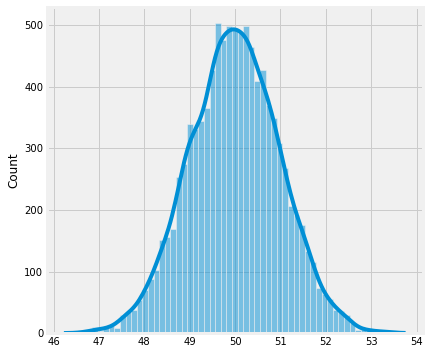

In [32]:
sns.histplot(a, kde=True)

<br>

### Specifying the standard deviation
***

In [40]:
# Produce 10000 values from within 1.5 standard deviation of 10.
x = rng.normal(loc=10, scale=1.5, size=10000)

In [41]:
# Check the size of output array.
x.size

10000

In [43]:
x.std()

1.5079150550039846

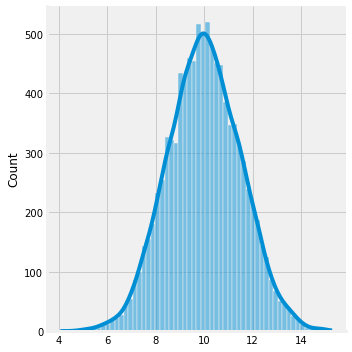

In [35]:
# Plotting the data with normal distribution curve.
sns.displot(x, kde=True)

The mean is indicated here with the tip of the bell curve and because the scale(standard deviation) was set to 1.5, we observe a steeper curve than the example above. The area between the lines either side of the mean represent around 87 percent of the data.  

<br>

### Refrences:
***

[1] https://studiousguy.com/real-life-examples-normal-distribution/

[2] https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2

<br>

## numpy.random.normal

https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

***- `replace=True` means that each random selection will contain all of the orginal values. 

In [ ]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [ ]:
# Look at the first ten items.
s[:10]

In [ ]:
abs(mu - np.mean(s))

In [ ]:
abs(sigma - np.std(s, ddof=1))

In [ ]:
count, bins, ignored = plt.hist(s, 30, density=True)
f = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2/(2 * sigma**2))
plt.plot(bins, f, linewidth=2)
plt.show()

<br>

## Rolling dice

***

Roll a single dice.

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

In [ ]:
# Pick a random integer between 1 (inclusive) and 7 (exclusive).
np.random.randint(1, 7)

Roll several dice.

In [ ]:
runs = 10000

In [ ]:
# Pick many random integers between 1 (inclusive) and 7 (exclusive).
dice = np.random.randint(1, 7, runs)

In [ ]:
# See the values.
print(dice)

<br>

Plot the dice rolls

https://numpy.org/doc/stable/reference/generated/numpy.unique.html

***

In [ ]:
# Count the number of times each face appears.
faces, counts = np.unique(dice, return_counts=True)
faces, counts

In [ ]:
# Create a new plot.
fig, ax = plt.subplots()
# Bar chart.
ax.barh(faces, counts)
# Set axis labels.
ax.set_ylabel('Face')
ax.set_xlabel('Count');

<br>

## Roll more than one dice

***

In [ ]:
# The number of dice to roll in each turn.
nodice = 2
# The number of turns.
noturns = 10000
# Roll the dice.
dice = np.random.randint(1, 7, (noturns, nodice))
# Have a look.
dice

In [ ]:
# Sum the faces of the dice.
totals = np.sum(dice, axis=1)
# Have a look.
totals

In [ ]:
# Count the number of times each face appears.
faces, counts = np.unique(totals, return_counts=True)
faces, counts

In [ ]:
# Create a new plot.
fig, ax = plt.subplots()
# Bar chart.
ax.bar(faces, counts)
# Set axis labels.
ax.set_ylabel('Face')
ax.set_xlabel('Count');

<br>

## Lots of dice

***

In [ ]:
# The number of dice to roll in each turn.
nodice = 100
# The number of turns.
noturns = 100000
# Roll the dice.
dice = np.random.randint(1, 7, (noturns, nodice))
# Sum the faces of the dice.
totals = np.sum(dice, axis=1)
# Count the number of times each face appears.
faces, counts = np.unique(totals, return_counts=True)
# Create a new plot.
fig, ax = plt.subplots()
# Bar chart.
ax.bar(faces, counts)
# Set axis labels.
ax.set_ylabel('Face total')
ax.set_xlabel('Count');

## References

***

[1] https://www.datacamp.com/community/tutorials/numpy-random

***

## End